# 中点変異法

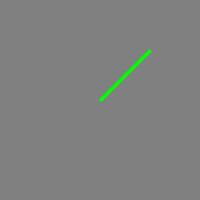

In [13]:
from PIL import Image, ImageDraw
import numpy as np

# 画像の大きさ
W, H = 200, 200
# XYの範囲
X0, X1 = -10, 10
Y0, Y1 = -10, 10
 
# Xからuへの変換
def x2u(x):
    a = W/(X1 - X0)
    b = -X0*a
    return int(a * x + b)
 
# Yからvへの変換
def y2v(y):
    a = H/(Y0 - Y1)
    b = -Y1*a
    return int(a * y + b)

def xy2uv(r):
    u = x2u(r[0])
    v = y2v(r[1])
    return np.array([u, v])

def myline(draw, r0, r1, col=(255, 255, 0), w=3):
    s0 = xy2uv(r0)
    s1 = xy2uv(r1)
    draw.line((s0[0], s0[1], s1[0], s1[1]), 
          fill=col, width=w)
    return
    
# test
img = Image.new("RGB", (W, H), (128, 128, 128))
draw = ImageDraw.Draw(img)
myline(draw, (0, 0), (5, 5), col=(0, 255, 0), w=5)
img # 画像表示

# 1次元バージョン

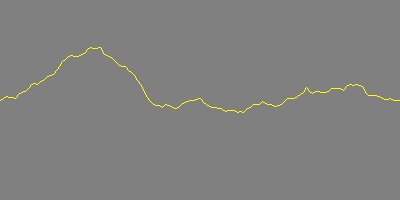

In [97]:
# r0, r1 を線で結ぶ機能
# 中点をm としたら、r0, m, r1 を作成。|r0 - r1| * alpha の乱数を加える

def mountain(draw, r0, r1, nn, alpha=0.3, col=(0, 255, 0), w=5):
    if nn > 1:
        mm = (r0 + r1) / 2
        mm[1] += np.random.randn() * alpha * np.abs(r0[0] - r1[0])
        mountain(draw, r0, mm, nn - 1, col=col, w=w)
        mountain(draw, mm, r1, nn - 1, col=col, w=w)
        return mm
    else:       
        myline(draw, r0, r1, col=col, w=w)
        return None

# 画像の大きさ
W, H = 400, 200
# XYの範囲
X0, X1 = -10, 10
Y0, Y1 = -10, 10
 

img = Image.new("RGB", (W, H), (128, 128, 128))
draw = ImageDraw.Draw(img)
r0 = np.array((-10, 0))
r1 = np.array((10, 0))
mountain(draw, r0, r1, 8, alpha=0.4, col=(255, 255, 0), w=1)
img

# 2次元バージョン

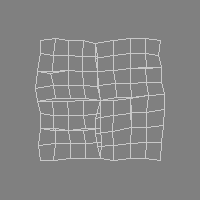

In [124]:
# Xからuへの変換
class Trans:
    def __init__(self, W=200, H=200,
                 X0=-10, X1=10,
                 Y0=-10, Y1=10,
                 dXdZ=0.5, dYdZ=0.5):
        self.W = W
        self.H = H
        self.X0 = X0
        self.X1 = X1
        self.Y0 = Y0
        self.Y1 = Y1
        self.dXdZ = dXdZ
        self.dYdZ = dYdZ
        self.unitX = self.x2u(1) - self.x2u(0)
        self.unitY = self.y2v(1) - self.y2v(0)
        
    def x2u(self, x):
        # xからuへの変換
        a = self.W / (self.X1 - self.X0)
        b = -self.X0 * a
        return int(a * x + b)

    # yからvへの変換
    def y2v(self, y):
        a = self.H / (self.Y0 - self.Y1)
        b = -self.Y1 * a
        return int(a * y + b)

    def xyz2uv(self, r):
        # xyz から uv
        u = self.x2u(r[0]) + self.unitX * self.dXdZ * r[2]
        v = self.y2v(r[1]) + self.unitY * self.dYdZ * r[2]
        return np.array([u, v])

    def line3d(self, draw, r0, r1, col=(255, 255, 255), ww=1):
        s0 = self.xyz2uv(r0)
        s1 = self.xyz2uv(r1)
        draw.line((s0[0], s0[1], s1[0], s1[1]), 
              fill=col, width=ww)
        return

    def mountain2d(self, draw, r0, r1, r2, r3, nn, alpha=0.3, col=(0, 0, 0), ww=1):
        if nn > 1:
            mm = (r0 + r1 + r2 + r3) / 4
            r01 = (r0 + r1) / 2 + np.random.randn() * np.linalg.norm(r0 - r1) * alpha 
            r02 = (r0 + r2) / 2 + np.random.randn() * np.linalg.norm(r0 - r2) * alpha 
            r13 = (r1 + r3) / 2 + np.random.randn() * np.linalg.norm(r1 - r3) * alpha 
            r23 = (r2 + r3) / 2 + np.random.randn() * np.linalg.norm(r2 - r3) * alpha 
            self.mountain2d(draw, r0, r01, r02, mm, nn - 1, alpha=alpha, col=col, ww=ww)
            self.mountain2d(draw, r01, r1, mm, r13, nn - 1 , alpha=alpha, col=col, ww=ww)
            self.mountain2d(draw, r02, mm, r2, r23, nn - 1, alpha=alpha, col=col, ww=ww)
            self.mountain2d(draw, mm, r13, r23, r3, nn - 1, alpha=alpha, col=col, ww=ww)
        else:
            self.line3d(draw, r0, r1, col=col, ww=ww)
            self.line3d(draw, r0, r2, col=col, ww=ww)
            self.line3d(draw, r1, r3, col=col, ww=ww)
            self.line3d(draw, r2, r3, col=col, ww=ww)

# main

W = 200
H = 200
img = Image.new("RGB", (W, H), (128, 128, 128))
draw = ImageDraw.Draw(img)
ss = 6
r0 = np.array((-ss, ss, 0))
r1 = np.array((ss, ss, 0))
r2 = np.array((-ss, -ss, 0))
r3 = np.array((ss, -ss, 0))

tt = Trans()
tt.mountain2d(draw, r0, r1, r2, r3, nn=4, alpha=0.02, col=(200, 200, 200))
img

この方法だと隙間が空いてしまうのだった。

# 2次元配列に高さを入れる方法

ff (17, 17)
0.5
----- [8 0]
nn 2, ss 5
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
0.25
----- [12  0]
nn 2, ss 5
[[0. 0. 0. 0. 1.]]
0.5
----- [8 4]
nn 2, ss 5
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
0.25
----- [12  4]
nn 2, ss 5
[[1. 0. 0. 0. 0.]]


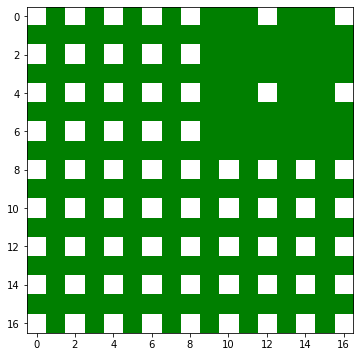

In [350]:
import matplotlib.pyplot as plt
%matplotlib inline
# サイズは漸化式で求まる
# a1 = 3
# a2 = 2 * a1 - 1
# an = 2**n + 1

def update(si, nn=3, alpha=0.1):
    di = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=np.uint8)  
    
    if nn < 2:
        return
    ss = 2 ** nn + 1
    # 中心の値を入力
    val = np.zeros(4)
    for i in range(4):
        ci = si + di[i] * (ss - 1)
        val[i] = ff[ci[0], ci[1]]
    center_val = np.mean(val) + np.random.rand() * ss * alpha
    # /////
    if center_val < 0.99:
        print(center_val)
        print('-----', si)
        print('nn %d, ss %d' % (nn, ss))
        print(ff[ci[0]:ci[0]+ss, ci[1]:ci[1]+ss])
        return
    # /////
    cx = int(si[0] + 0.5 * (ss - 1)) 
    cy = int(si[1] + 0.5 * (ss - 1))
    ff[cy, cx] = center_val
    
    # 辺の中点の値を入力
    # up
    edge_val = (val[0] + val[1] +center_val) / 3 + np.random.rand() * ss * alpha
    cx = int(si[0] + 0.5 * (ss - 1)) 
    cy = int(si[1])
    if ff[cy, cx] == 0:
        ff[cy, cx] = edge_val
    # left
    edge_val = (val[0] + val[2] +center_val) / 3 + np.random.rand() * ss * alpha
    cx = int(si[0]) 
    cy = int(si[1] + 0.5 * (ss - 1))
    if ff[cy, cx] == 0:
        ff[cy, cx] = edge_val
    # right
    edge_val = (val[1] + val[3] +center_val) / 3 + np.random.rand() * ss * alpha
    cx = int(si[0] + (ss - 1)) 
    cy = int(si[1] + 0.5 * (ss - 1))
    if ff[cy, cx] == 0:
        ff[cy, cx] = edge_val
    # down
    edge_val = (val[2] + val[3] +center_val) / 3 + np.random.rand() * ss * alpha
    cx = int(si[0] + 0.5 * (ss - 1)) 
    cy = int(si[1] + (ss - 1))
    if ff[cy, cx] == 0:
        ff[cy, cx] = edge_val
    
    # 4つの領域
    for i in range(4):
        ssi = si + di[i] * (ss - 1) * 0.5
        ssi = ssi.astype(np.int)
        update(ssi, nn - 1, alpha=alpha)

# test         
nn = 4
ss = 2 ** nn + 1
ff = np.zeros((ss, ss))
ff[0, 0] = 1
ff[ss - 1, 0] = 1
ff[ss - 1, ss - 1] = 1
ff[0, ss - 1] = 1
print('ff', ff.shape)
si = np.array([0, 0], dtype=np.uint8)
update(si, nn, alpha=0.0)
plt.figure(figsize=(6, 6))
plt.imshow(ff, cmap='ocean')
plt.show()

In [345]:
ff.shape

(17, 17)